# THE PROBLEM STATEMENT

# Import the Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Read the Data

In [2]:
df = pd.read_csv("startup data.csv")
pd.set_option('display.max_columns',50)
pd.set_option('display.width', 100)

In [76]:
df.head()

,state_code,latitude,longitude,zip_code,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1,2007-01-01,2013-06-01,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1,2000-01-01,2013-06-01,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,92121,San Diego,Plixi,1,2009-03-18,2013-06-01,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,1,2002-01-01,2013-06-01,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,acquired
4,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,0,2010-08-01,2012-10-01,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,closed


# Data Preprocessing 

In [4]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id', 'city', 'Unnamed: 6',
       'name', 'labels', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at',
       'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd',
       'milestones', 'state_code.1', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate',
       'category_code', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory',
       'object_id', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'status'],
      dtype='object')

In [5]:
df.columns.shape

(49,)

# Drop the unnecessary columns

In [6]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 6', 'id', 'object_id'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_code                923 non-null    object 
 1   latitude                  923 non-null    float64
 2   longitude                 923 non-null    float64
 3   zip_code                  923 non-null    object 
 4   city                      923 non-null    object 
 5   name                      923 non-null    object 
 6   labels                    923 non-null    int64  
 7   founded_at                923 non-null    object 
 8   closed_at                 335 non-null    object 
 9   first_funding_at          923 non-null    object 
 10  last_funding_at           923 non-null    object 
 11  age_first_funding_year    923 non-null    float64
 12  age_last_funding_year     923 non-null    float64
 13  age_first_milestone_year  771 non-null    float64
 14  age_last_m

In [8]:
df.isna().sum()

state_code                    0
latitude                      0
longitude                     0
zip_code                      0
city                          0
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_games

# Handling Missing Values

In [9]:
# for object datatypes
df['closed_at'].fillna(df['closed_at'].mode()[0], inplace=True)
df['state_code.1'].fillna(df['state_code.1'].mode()[0], inplace=True)

# for float datatypes
df['age_first_milestone_year'].fillna(df['age_first_milestone_year'].median(), inplace=True)
df['age_last_milestone_year'].fillna(df['age_last_milestone_year'].median(), inplace=True)




In [10]:
df.isna().sum()

state_code                  0
latitude                    0
longitude                   0
zip_code                    0
city                        0
name                        0
labels                      0
founded_at                  0
closed_at                   0
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
state_code.1                0
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommerce                0
is_biotech

In [11]:
# Convert date columns to datetime objects for easy arithmetic operations. 
df['founded_at'] = pd.to_datetime(df['founded_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'])
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'])

In [12]:
df

,state_code,latitude,longitude,zip_code,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1,2007-01-01,2013-06-01,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1,2000-01-01,2013-06-01,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,92121,San Diego,Plixi,1,2009-03-18,2013-06-01,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,1,2002-01-01,2013-06-01,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,acquired
4,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,0,2010-08-01,2012-10-01,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,37.740594,-122.376471,94107,San Francisco,CoTweet,1,2009-01-01,2013-06-01,2009-07-09,2009-07-09,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,CA,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,6.0000,1,acquired
919,MA,42.504817,-71.195611,1803,Burlington,Reef Point Systems,0,1998-01-01,2008-06-25,2005-04-01,2007-03-23,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,MA,0,0,1,0,0,security,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,2.6667,1,closed
920,CA,37.408261,-122.015920,94089,Sunnyvale,Paracor Medical,0,1999-01-01,2012-06-17,2007-06-29,2007-06-29,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,CA,1,0,0,0,0,biotech,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,8.0000,1,closed
921,CA,37.556732,-122.288378,94404,San Francisco,Causata,1,2009-01-01,2013-06-01,2009-10-05,2011-11-01,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1.0000,1,acquired


In [ ]:
# Seperate categorical and Continious columns 

In [13]:
cat = []
con = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [14]:
df_con = con
df_con=df[con]
df_con

,latitude,longitude,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,42.358880,-71.056820,1,2007-01-01,2013-06-01,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0
1,37.238916,-121.973718,1,2000-01-01,2013-06-01,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1
2,32.901049,-117.192656,1,2009-03-18,2013-06-01,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1
3,37.320309,-122.050040,1,2002-01-01,2013-06-01,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1
4,37.779281,-122.419236,0,2010-08-01,2012-10-01,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,37.740594,-122.376471,1,2009-01-01,2013-06-01,2009-07-09,2009-07-09,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,6.0000,1
919,42.504817,-71.195611,0,1998-01-01,2008-06-25,2005-04-01,2007-03-23,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,2.6667,1
920,37.408261,-122.015920,0,1999-01-01,2012-06-17,2007-06-29,2007-06-29,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,8.0000,1
921,37.556732,-122.288378,1,2009-01-01,2013-06-01,2009-10-05,2011-11-01,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1.0000,1


In [15]:
df_cat = cat
df_cat=df[cat]
df_cat

,state_code,zip_code,city,name,state_code.1,category_code,status
0,CA,92101,San Diego,Bandsintown,CA,music,acquired
1,CA,95032,Los Gatos,TriCipher,CA,enterprise,acquired
2,CA,92121,San Diego,Plixi,CA,web,acquired
3,CA,95014,Cupertino,Solidcore Systems,CA,software,acquired
4,CA,94105,San Francisco,Inhale Digital,CA,games_video,closed
...,...,...,...,...,...,...,...
918,CA,94107,San Francisco,CoTweet,CA,advertising,acquired
919,MA,1803,Burlington,Reef Point Systems,MA,security,closed
920,CA,94089,Sunnyvale,Paracor Medical,CA,biotech,closed
921,CA,94404,San Francisco,Causata,CA,software,acquired


# Removing Outliers

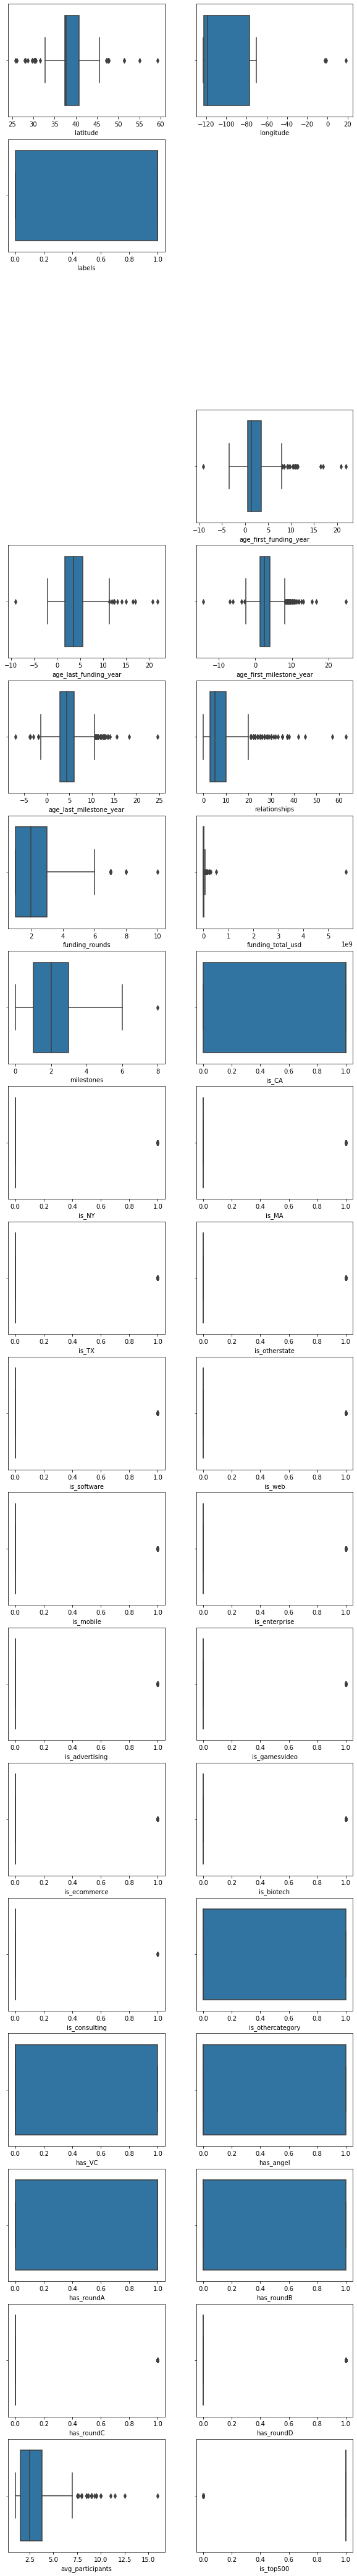

In [16]:
plt.figure(figsize=(10,80))
for x,i in enumerate(df_con.columns):
    if df_con[i].dtypes=='int64' or df_con[i].dtypes=='float64':
        plt.subplot(20,2,x+1)
        sns.boxplot(df_con[i])

In [17]:
for i in df_con.columns:
    q1 = df_con[i].quantile(0.25)
    q3 = df_con[i].quantile(0.75)
    IQR = q3-q1
    uppertail = q3+1.5*IQR
    lowertail = q1-1.5*IQR
    df_con.loc[(df_con[i]>uppertail)|(df_con[i]<lowertail)]
    mean_1= df_con[i].mean()
    df_con.loc[(df_con[i]>uppertail)| (df_con[i]<lowertail),i]=mean_1


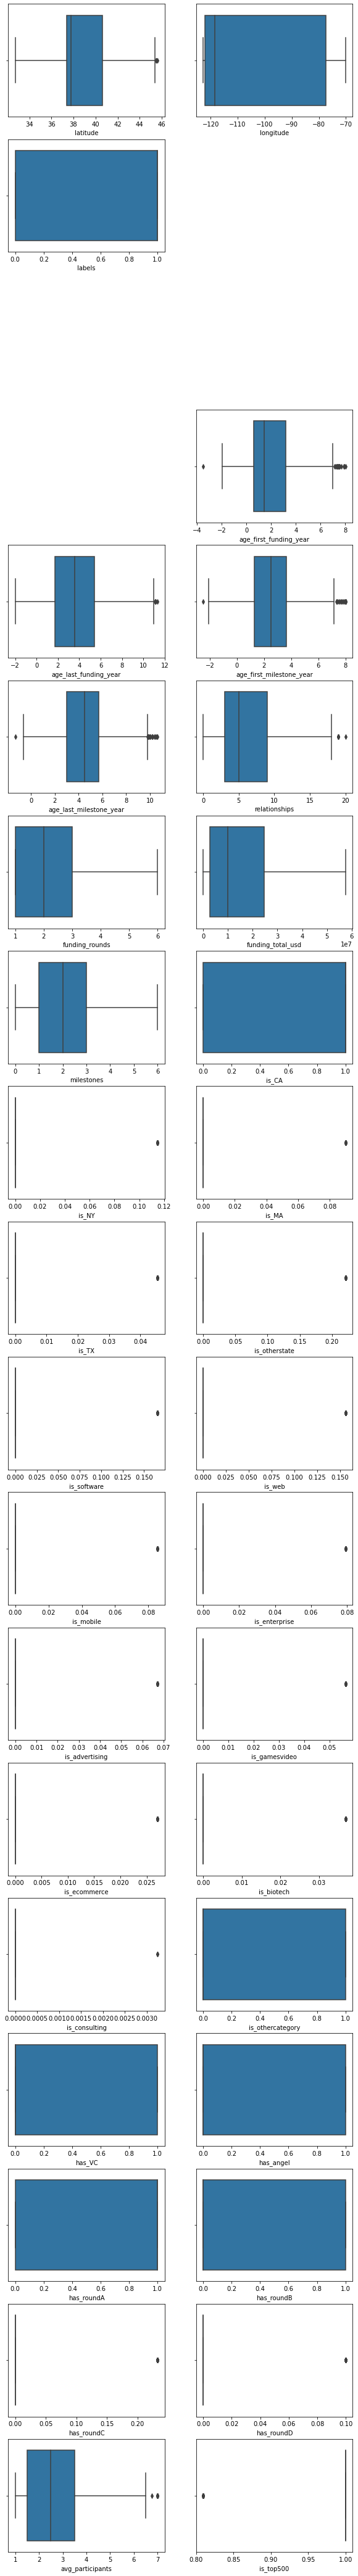

In [18]:
plt.figure(figsize=(10,80))
for x,i in enumerate(df_con.columns):
    if df_con[i].dtypes=='int64' or df_con[i].dtypes=='float64':
        plt.subplot(20,2,x+1)
        sns.boxplot(df_con[i])

In [19]:
# Drop the target column ('status') from the features and store it separately
X = df_cat.drop(columns=['status'])
y = df_cat['status']

# ONE HOT ENCODING

In [20]:
df_dum=pd.get_dummies(X)

In [21]:
df_dum.head()

,state_code_AR,state_code_AZ,state_code_CA,state_code_CO,state_code_CT,state_code_DC,state_code_FL,state_code_GA,state_code_ID,state_code_IL,state_code_IN,state_code_KY,state_code_MA,state_code_MD,state_code_ME,state_code_MI,state_code_MN,state_code_MO,state_code_NC,state_code_NH,state_code_NJ,state_code_NM,state_code_NV,state_code_NY,state_code_OH,...,category_code_finance,category_code_games_video,category_code_hardware,category_code_health,category_code_hospitality,category_code_manufacturing,category_code_medical,category_code_messaging,category_code_mobile,category_code_music,category_code_network_hosting,category_code_news,category_code_other,category_code_photo_video,category_code_public_relations,category_code_real_estate,category_code_search,category_code_security,category_code_semiconductor,category_code_social,category_code_software,category_code_sports,category_code_transportation,category_code_travel,category_code_web
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
df_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   latitude                  923 non-null    float64       
 1   longitude                 923 non-null    float64       
 2   labels                    923 non-null    float64       
 3   founded_at                923 non-null    datetime64[ns]
 4   closed_at                 923 non-null    datetime64[ns]
 5   first_funding_at          923 non-null    datetime64[ns]
 6   last_funding_at           923 non-null    datetime64[ns]
 7   age_first_funding_year    923 non-null    float64       
 8   age_last_funding_year     923 non-null    float64       
 9   age_first_milestone_year  923 non-null    float64       
 10  age_last_milestone_year   923 non-null    float64       
 11  relationships             923 non-null    float64       
 12  funding_rounds        

In [23]:
df_con.columns

Index(['latitude', 'longitude', 'labels', 'founded_at', 'closed_at', 'first_funding_at',
       'last_funding_at', 'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate',
       'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo',
       'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC', 'has_angel',
       'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500'],
      dtype='object')

In [24]:
# Convert float columns to integer columns
int_columns = df_con.columns[df_con.dtypes == float].tolist()
df_con[int_columns] = df_con[int_columns].astype(int)


# convert datatime64 columns into integer columns
date_columns = ['founded_at', 'closed_at', 'first_funding_at', 'last_funding_at']
df_con[date_columns] = df_con[date_columns].apply(pd.to_datetime)


# Convert datetime to integer (number of seconds since the Unix epoch)
df_con[date_columns] = df_con[date_columns].apply(lambda x: (x - pd.Timestamp("1970-01-01")) // pd.Timedelta(seconds=1))


In [25]:
df_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   latitude                  923 non-null    int32
 1   longitude                 923 non-null    int32
 2   labels                    923 non-null    int32
 3   founded_at                923 non-null    int64
 4   closed_at                 923 non-null    int64
 5   first_funding_at          923 non-null    int64
 6   last_funding_at           923 non-null    int64
 7   age_first_funding_year    923 non-null    int32
 8   age_last_funding_year     923 non-null    int32
 9   age_first_milestone_year  923 non-null    int32
 10  age_last_milestone_year   923 non-null    int32
 11  relationships             923 non-null    int32
 12  funding_rounds            923 non-null    int32
 13  funding_total_usd         923 non-null    int32
 14  milestones                923 non-null    

In [ ]:
# Target Categorical columns convert into numerical 

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
# Normalizing the Numerical columns

In [27]:
std_scaler = StandardScaler()
std_scaler = std_scaler.fit_transform(df_con)

In [29]:
x = pd.DataFrame(std_scaler,columns=df_con.columns)

In [30]:
x

,latitude,longitude,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,1.629215,1.525611,0.738961,0.360280,0.551959,0.569295,0.166106,0.186039,-0.134861,0.873527,0.844282,-0.757572,0.641689,-1.025149,0.892243,0.946191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.448211,-0.695646,1.71104,-1.016386,-0.803291,0.0,0.0,-1.013600,-2.060174
1,-0.369410,-0.818865,0.738961,-1.707879,0.551959,-1.253806,0.160963,1.785855,2.156117,2.429024,1.275296,0.604582,1.463157,1.952106,-0.638501,0.946191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690507,1.437514,-0.58444,-1.016386,1.244879,0.0,0.0,1.062331,0.485396
2,-2.368035,-0.631307,0.738961,1.013000,0.551959,1.008436,0.279241,-0.347234,-0.898520,-0.681969,-0.879772,-0.303521,-1.001248,-0.858392,0.126871,0.946191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690507,-0.695646,-0.58444,0.983879,-0.803291,0.0,0.0,1.062331,0.485396
3,-0.369410,-0.865754,0.738961,-1.116630,0.551959,-1.250177,-1.096386,0.719311,0.628798,1.910525,0.844282,-0.303521,0.641689,1.944611,-0.638501,0.946191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690507,-0.695646,-0.58444,-1.016386,1.244879,0.0,0.0,0.370354,0.485396
4,-0.369410,-0.865754,-1.353251,1.418220,-1.132294,1.158446,1.221611,-0.880506,-0.898520,-1.200468,-1.741799,-0.984597,-0.179780,-0.955823,-0.638501,0.946191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690507,1.437514,1.71104,-1.016386,-0.803291,0.0,0.0,-1.013600,0.485396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,-0.369410,-0.865754,0.738961,0.951529,0.551959,0.689061,-0.060166,-0.880506,-1.280349,-1.200468,-0.017745,0.604582,-1.001248,-0.970812,0.126871,0.946191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690507,-0.695646,-0.58444,0.983879,-0.803291,0.0,0.0,2.446285,0.485396
919,1.629215,1.525611,-1.353251,-2.298320,-0.957222,-1.198157,-1.138812,2.852399,2.156117,1.910525,0.844282,-1.211623,0.641689,2.843970,-0.638501,-1.056869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.448211,1.437514,-0.58444,-1.016386,1.244879,0.0,0.0,-0.321623,0.485396
920,-0.369410,-0.865754,-1.353251,-2.003099,-1.866988,-0.207368,-1.012820,0.186039,1.774287,-0.163470,2.137323,-0.303521,-1.001248,2.244397,-0.638501,0.946191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690507,-0.695646,-0.58444,-1.016386,-0.803291,0.0,0.0,-0.321623,0.485396
921,-0.369410,-0.865754,0.738961,0.951529,0.551959,0.795519,1.026194,-0.880506,-0.516690,-1.200468,-0.448759,1.285658,-0.179780,0.108419,0.126871,0.946191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690507,-0.695646,-0.58444,0.983879,1.244879,0.0,0.0,-1.013600,0.485396


In [31]:
# Merging one hot encoding and standardization data

In [32]:
df_merge = pd.concat([df_dum,x],axis=1)
df_merge

,state_code_AR,state_code_AZ,state_code_CA,state_code_CO,state_code_CT,state_code_DC,state_code_FL,state_code_GA,state_code_ID,state_code_IL,state_code_IN,state_code_KY,state_code_MA,state_code_MD,state_code_ME,state_code_MI,state_code_MN,state_code_MO,state_code_NC,state_code_NH,state_code_NJ,state_code_NM,state_code_NV,state_code_NY,state_code_OH,...,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-1.025149,0.892243,0.946191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.448211,-0.695646,1.71104,-1.016386,-0.803291,0.0,0.0,-1.013600,-2.060174
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.952106,-0.638501,0.946191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690507,1.437514,-0.58444,-1.016386,1.244879,0.0,0.0,1.062331,0.485396
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-0.858392,0.126871,0.946191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690507,-0.695646,-0.58444,0.983879,-0.803291,0.0,0.0,1.062331,0.485396
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.944611,-0.638501,0.946191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690507,-0.695646,-0.58444,-1.016386,1.244879,0.0,0.0,0.370354,0.485396
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-0.955823,-0.638501,0.946191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690507,1.437514,1.71104,-1.016386,-0.803291,0.0,0.0,-1.013600,0.485396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-0.970812,0.126871,0.946191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690507,-0.695646,-0.58444,0.983879,-0.803291,0.0,0.0,2.446285,0.485396
919,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,2.843970,-0.638501,-1.056869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.448211,1.437514,-0.58444,-1.016386,1.244879,0.0,0.0,-0.321623,0.485396
920,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2.244397,-0.638501,0.946191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690507,-0.695646,-0.58444,-1.016386,-0.803291,0.0,0.0,-0.321623,0.485396
921,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.108419,0.126871,0.946191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690507,-0.695646,-0.58444,0.983879,1.244879,0.0,0.0,-1.013600,0.485396


# Split the data into training and test sets


In [50]:
X_train, X_test, y_train, y_test = train_test_split(df_merge,y,test_size=0.2, random_state=42)

In [51]:
X_train

,state_code_AR,state_code_AZ,state_code_CA,state_code_CO,state_code_CT,state_code_DC,state_code_FL,state_code_GA,state_code_ID,state_code_IL,state_code_IN,state_code_KY,state_code_MA,state_code_MD,state_code_ME,state_code_MI,state_code_MN,state_code_MO,state_code_NC,state_code_NH,state_code_NJ,state_code_NM,state_code_NV,state_code_NY,state_code_OH,...,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,-0.641047,-0.638501,-1.056869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690507,1.437514,-0.58444,-1.016386,-0.803291,0.0,0.0,0.370354,0.485396
227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,-0.903360,0.126871,-1.056869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690507,-0.695646,-0.58444,0.983879,-0.803291,0.0,0.0,0.370354,0.485396
692,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.070946,-0.638501,0.946191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690507,-0.695646,-0.58444,-1.016386,-0.803291,0.0,0.0,0.370354,0.485396
587,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,-1.008286,-1.403873,-1.056869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690507,-0.695646,1.71104,-1.016386,-0.803291,0.0,0.0,-0.321623,-2.060174
883,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-0.753467,-0.638501,0.946191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690507,1.437514,-0.58444,-1.016386,-0.803291,0.0,0.0,-1.013600,-2.060174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.851871,0.892243,-1.056869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690507,1.437514,-0.58444,-1.016386,-0.803291,0.0,0.0,-0.321623,0.485396
270,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.145892,-1.403873,-1.056869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690507,-0.695646,-0.58444,0.983879,1.244879,0.0,0.0,0.370354,0.485396
860,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.632071,0.126871,0.946191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.448211,1.437514,-0.58444,-1.016386,1.244879,0.0,0.0,-0.321623,0.485396
435,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,-0.884064,-1.403873,-1.056869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690507,1.437514,-0.58444,-1.016386,-0.803291,0.0,0.0,-1.013600,-2.060174


In [52]:
X_test

,state_code_AR,state_code_AZ,state_code_CA,state_code_CO,state_code_CT,state_code_DC,state_code_FL,state_code_GA,state_code_ID,state_code_IL,state_code_IN,state_code_KY,state_code_MA,state_code_MD,state_code_ME,state_code_MI,state_code_MN,state_code_MO,state_code_NC,state_code_NH,state_code_NJ,state_code_NM,state_code_NV,state_code_NY,state_code_OH,...,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
323,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-0.903360,0.126871,0.946191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.448211,-0.695646,1.71104,-1.016386,-0.803291,0.0,0.0,0.370354,0.485396
861,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-0.468670,0.126871,0.946191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690507,1.437514,-0.58444,-1.016386,-0.803291,0.0,0.0,-0.321623,0.485396
30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-0.266314,-0.638501,0.946191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.448211,-0.695646,-0.58444,0.983879,1.244879,0.0,0.0,-0.321623,0.485396
837,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-0.453681,-0.638501,0.946191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690507,1.437514,-0.58444,-1.016386,-0.803291,0.0,0.0,0.370354,0.485396
294,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,-0.069205,-0.638501,-1.056869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690507,1.437514,-0.58444,0.983879,-0.803291,0.0,0.0,-0.321623,0.485396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.547394,1.657615,0.946191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690507,1.437514,1.71104,0.983879,1.244879,0.0,0.0,1.754308,0.485396
827,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,-1.052129,-0.638501,-1.056869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690507,-0.695646,1.71104,-1.016386,-0.803291,0.0,0.0,-1.013600,-2.060174
490,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-0.191367,3.188359,0.946191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690507,-0.695646,-0.58444,0.983879,1.244879,0.0,0.0,-1.013600,0.485396
753,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-0.828414,0.126871,0.946191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690507,-0.695646,-0.58444,0.983879,-0.803291,0.0,0.0,-0.321623,0.485396


In [53]:
y_train

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [54]:
y_test

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1])

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building

In [66]:
# Train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)


LogisticRegression()

In [68]:
#  Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)

# Model Evaluation

In [73]:
# Decode the predicted labels
# If you want to convert the numerical predictions back to text labels
predicted_labels = label_encoder.inverse_transform(y_pred)


In [70]:
#  Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       112
           1       1.00      0.89      0.94        73

    accuracy                           0.96       185
   macro avg       0.97      0.95      0.95       185
weighted avg       0.96      0.96      0.96       185



In [71]:
#  Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9567567567567568
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       112
           1       1.00      0.89      0.94        73

    accuracy                           0.96       185
   macro avg       0.97      0.95      0.95       185
weighted avg       0.96      0.96      0.96       185



In [72]:
column_list = df_merge.columns

In [61]:
column_list

Index(['state_code_AR', 'state_code_AZ', 'state_code_CA', 'state_code_CO', 'state_code_CT',
       'state_code_DC', 'state_code_FL', 'state_code_GA', 'state_code_ID', 'state_code_IL',
       ...
       'is_consulting', 'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500'],
      dtype='object', length=1668)

# Final Prediction

In [62]:
prediction = logreg_model.predict(df_merge)

In [63]:
prediction_test = pd.DataFrame(prediction)

In [64]:
prediction_test

,0
0,0
1,0
2,0
3,0
4,1
...,...
918,0
919,1
920,1
921,0


# Startup Prediction

In [99]:
df_status.rename(columns={'column 0': 'startup'}, inplace=True)

In [105]:
df_status = prediction_test.replace({0:"SUCCESSFUL",1:'FAILURE'})
df_status

,0
0,SUCCESSFUL
1,SUCCESSFUL
2,SUCCESSFUL
3,SUCCESSFUL
4,FAILURE
...,...
918,SUCCESSFUL
919,FAILURE
920,FAILURE
921,SUCCESSFUL


In [126]:
# Adding Startup Prediction column into original data_frame

In [116]:
merged_df = pd.concat([df,df_status],axis=1)

In [123]:
merged_df.rename(columns={0: 'Startup_Prediction'}, inplace=True)
df_merge = merged_df.drop('status',axis=1)

In [125]:
df_merge.head()

,state_code,latitude,longitude,zip_code,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,Startup_Prediction
0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1,2007-01-01,2013-06-01,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,SUCCESSFUL
1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1,2000-01-01,2013-06-01,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,SUCCESSFUL
2,CA,32.901049,-117.192656,92121,San Diego,Plixi,1,2009-03-18,2013-06-01,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,SUCCESSFUL
3,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,1,2002-01-01,2013-06-01,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,SUCCESSFUL
4,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,0,2010-08-01,2012-10-01,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,FAILURE


In [127]:
df_merge.to_csv('startup_rate_prediction.csv', index=False)
